In [2]:
#import
import pandas as pd
import seaborn as sns
from nltk.sentiment import SentimentIntensityAnalyzer


# Q1
## What is the Y variable?
### How many categories are there pre-processing?

In [3]:
df = pd.read_csv('./Drugs.com reviews.csv')

In [4]:
df.columns

Index(['Drug name', 'Condition', 'Review', 'Star rating', 'Date',
       'Useful vote count'],
      dtype='object')

<Axes: xlabel='Star rating', ylabel='count'>

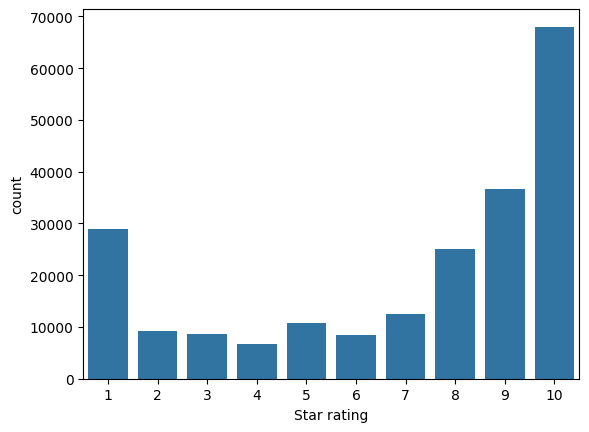

In [5]:
# We should use Star rating as the target variable
# lets check the distribution of the star rating
df['Star rating'].value_counts()
#plot the distribution of the star rating
#use seaborn
sns.countplot(x='Star rating', data=df)

# Q2 
## combine categories all categories to 3, call it sentiment, add it as a new column. Sentiment categories are: -1 (for negative), 0 (for neutral), and 1 (positive). 
### Provide mapping from old to new categories. Explain your reasoning for your mapping. 

In [6]:
#map 1-5 as negative, 5-8 as neutral, 9-10 as positive
mapping = {1: '-1', 2: '-1', 3: '-1', 
           4: '-1', 5: '-1', 6: '0', 7: '0', 8: '0', 9: '1', 10: '1'}

df['sentiment'] = df['Star rating'].map(mapping)


In [7]:
df['sentiment'].value_counts()

sentiment
1     104713
-1     64295
0      46055
Name: count, dtype: int64

# Q3 
# Provide any texts cleaning procedure that you do. 
## Explain why you use them with examples. 
### Aim to do at least 2. 

In [8]:
#first look at how many unique drugs are there
df['Drug name'].nunique()

3671

In [9]:
df.dtypes

Drug name            object
Condition            object
Review               object
Star rating           int64
Date                 object
Useful vote count     int64
sentiment            object
dtype: object

In [10]:
#strip the leading and trailing spaces
for columns in df.columns:
    if df[columns].dtype == 'object':
        df[columns] = df[columns].str.strip()

In [11]:
#convert all text to lower case
for columns in df.columns:
    if df[columns].dtype == 'object':
        df[columns] = df[columns].str.lower()


In [12]:
#check if @, #, ^, * are present in the column Review
df['Review'].str.contains('@|#|\^|\*|&').sum()

16199

In [13]:
#print the rows where @, #, ^, * are present
pd.set_option('display.max_colwidth', 500)
df['Review'][df['Review'].str.contains('@|#|\^|\*|&')][:-5]

4         was diagnosed 8/12/17, began treatment 9/25. i was super pumped. initially had a slight rash and my thumb didn&rsquo;t work, got too stiff to move two times for like a minute.  second day i felt great. high energy. stayed up late. yesterday i felt like butt all day. sore. stomach hurt. especially when i swallowed food or drink. today wasn&rsquo;t a whole lot better. at least yesterday i could eat. i&rsquo;ve taken 7 advil  over quite a long and now i can feel the crappiness coming back on. c...
10        i tested positive for hiv in january this year and started treatment with triumeq at the end of february with cd4 &lt; 150 and vl 66,000. on 26 march i had bloodwork again, with cd4 = 415 and vl &lt; 40.  i think the results speak for themselves, this drug is like a nuke. zero side effects except for general malaise and fatigue during the first couple of days - which i however attribute to immune reconstitution syndrome. unless you are hypersensitive to abacavir, i believe th

In [14]:
#notice the pattern &quot; is actually a double quote, change it to double quote
df['Review'] = df['Review'].str.replace('&quot;', '"')

In [15]:
#see if &amp; is present in the column Review
df['Review'].str.contains('&amp;').sum()

0

In [16]:
#&lt is less than, &gt is greater than
df['Review'] = df['Review'].str.replace('&lt;', 'less than')
df['Review'] = df['Review'].str.replace('&gt;', 'greater than')

In [17]:
# &apos; is an apostrophe
df['Review'] = df['Review'].str.replace('&apos;', "'")

In [18]:
df['Review'].str.contains('@').sum()

493

In [19]:
df['Review'][df['Review'].str.contains('@')]

134       i agree w/ triple dee. this drug=the worst. it  was suppose to help psychotics. it turned me into a zombie. also turned me into a compulsive shopper, which can be accomplished from the couch i became glued to due to my zombie state. with no motivation, my house was a mess. and, the eating!!! omg. i gained a pound a day. i have clinical depression and massive anxiety. i take 40mg of viibryd. tough tough drug to get on in the beginning, but i stuck to it and it's been a blessing. no sexual or ...
1805      suffered with tension migraines, combined with vascular/aura types for 25 yrs. went round and round w/tests, scans, rx's, shots, etc until finally my doctor prescribed anolor 300. hard to find anymore, but fioricet was a perfect replacement (same ingredients). it has helped immensely in my daily life. no missed workdays, or other important things in life since having this for the debilitating headaches. 30 mins after taking one, i am good to go. rarely do i ever need a 2nd do

In [20]:
#change @ to at
df['Review'] = df['Review'].str.replace('@', 'at')

In [21]:
#remove \n or \r
df['Review'] = df['Review'].str.replace('\n', '')
df['Review'] = df['Review'].str.replace('\r', '')

# Q4a 
# Use VADER (NLTK) to perform sentiment analysis on the texts and output to a new column called sentiment_engineer. 
## From the scores from VADER, provide a score of -1 negative, 0 neutral, 1 positive. 
### Explain the mapping from VADER score to this mapping. 
#### Explain your tokenization method and the reason why you choose them.

In [22]:
#remove any emojis in reviews
#non ascii characters
df['Review'] = df['Review'].str.replace('[^\x00-\x7F]+', '')

In [23]:
#remove any extra space in between words and sentences
df['Review'] = df['Review'].str.replace(' +', ' ') #regex space + means one or more spaces


In [24]:
# Create a SentimentIntensityAnalyzer object
sia = SentimentIntensityAnalyzer()

def get_full_sentiment(review):
    return sia.polarity_scores(review)

# Apply the function to your DataFrame
df['Polarity_Scores'] = df['Review'].apply(get_full_sentiment)



In [30]:
# Extract each score into a new column
df['Positive_Scores'] = df['Polarity_Scores'].apply(lambda x: x['pos'])
df['Neutral_Scores'] = df['Polarity_Scores'].apply(lambda x: x['neu'])
df['Negative_Scores'] = df['Polarity_Scores'].apply(lambda x: x['neg'])
df['Compound_Scores'] = df['Polarity_Scores'].apply(lambda x: x['compound'])

In [31]:
#average positive, neutral, negative and compound scores
print(f" average positive score is: {df['Positive_Scores'].mean()}")
print(f"average neutral score is: {df['Neutral_Scores'].mean()}")
print(f" average negative score is: {df['Negative_Scores'].mean()}")

 average positive score is: 0.10991526668929569
average neutral score is: 0.7748980624282185
 average negative score is: 0.11515308072518288


<Axes: xlabel='Compound_Scores', ylabel='Count'>

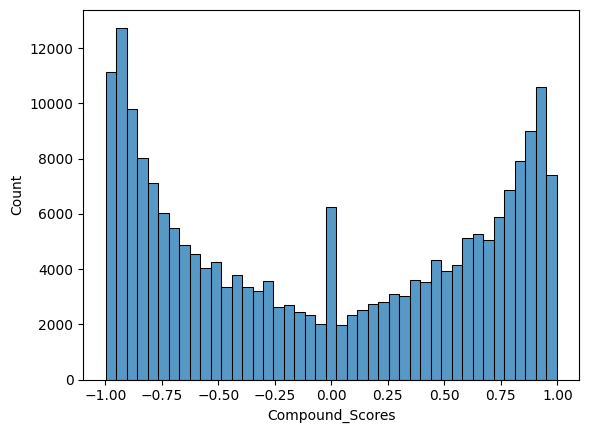

In [32]:
#plot df['Compooound_Scores']
sns.histplot(df['Compound_Scores'])

In [33]:
#based on the compound scores, we can classify the reviews as positive, negative or neutral
#sentiment
'''1: 104713
-1: 64295
0: 46055
'''
negative = 64295/(104713+64295+46055)
positive = 104713/(104713+64295+46055)
neutral = 46055/(104713+64295+46055)



In [34]:
negative, positive, neutral

(0.29895890971482775, 0.4868945378795981, 0.21414655240557418)

In [35]:
#range of compound score is -1 to 1
# I used the same cutoffs(percentage) from the mapping of star rating to sentiment

#lets create a new column sentiment based on compound score
negative_cutoff = df['Compound_Scores'].quantile(negative)  # Negative cutoff
neutral_positive_cutoff = df['Compound_Scores'].quantile(1-positive)  # Neutral to Positive cutoff
df['sentiment_engineer'] = df['Compound_Scores'].apply(
    lambda x: 1 if x > neutral_positive_cutoff else (-1 if x < negative_cutoff else 0)
)



In [36]:
#check the distribution of sentiment_score
df['sentiment_engineer'].value_counts()

sentiment_engineer
 1    101804
-1     64221
 0     49038
Name: count, dtype: int64

In [37]:
#change datatype of sentiment_score, sentiment to int
df['sentiment_engineer'] = df['sentiment_engineer'].astype(int)
df['sentiment'] = df['sentiment'].astype(int)

# Q5

In [38]:
#do a classification report on sentiment_score vs sentiment
from sklearn.metrics import classification_report
print(classification_report(df['sentiment'], df['sentiment_engineer']))

              precision    recall  f1-score   support

          -1       0.49      0.49      0.49     64295
           0       0.22      0.23      0.23     46055
           1       0.62      0.60      0.61    104713

    accuracy                           0.49    215063
   macro avg       0.44      0.44      0.44    215063
weighted avg       0.49      0.49      0.49    215063



In [39]:
df.columns

Index(['Drug name', 'Condition', 'Review', 'Star rating', 'Date',
       'Useful vote count', 'sentiment', 'Polarity_Scores', 'Positive_Scores',
       'Neutral_Scores', 'Negative_Scores', 'Compound_Scores',
       'sentiment_engineer'],
      dtype='object')

In [40]:
df.drop(['Polarity_Scores', 'Positive_Scores', 'Neutral_Scores', 'Negative_Scores', 'Compound_Scores'], axis=1, inplace=True)

# Q6

In [41]:
#drop rows where sentiment is 0
df = df[df['sentiment'] != 0]

In [42]:
df_svm = df[['Review', 'sentiment']]

In [43]:
#import
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Q7

In [44]:
# Split the data into train+test (90%) and inference (10%)
train_test_data, inference_data = train_test_split(df_svm, test_size=0.1, random_state=42)

# Split the remaining data into train (77.78% of 90% ≈ 70% of the whole) and test (22.22% of 90% ≈ 20% of the whole)
train_data, test_data = train_test_split(train_test_data, test_size=0.2, random_state=42)

# Q8

In [46]:

# Vectorize the data
vectorizer = TfidfVectorizer(ngram_range=(1, 2))

X_train = vectorizer.fit_transform(train_data['Review'])
X_test = vectorizer.transform(test_data['Review'])
X_inference = vectorizer.transform(inference_data['Review'])

y_train = train_data['sentiment']
y_test = test_data['sentiment']
y_inference = inference_data['sentiment']




In [160]:
#from sklearn.svm import SVC

# Train the SVM model
#svm_model = SVC(kernel='linear')
#svm_model.fit(X_train, y_train)

#take too long to train, switch to decision tree

In [47]:
# Initialize the Decision Tree Classifier
tree_model = DecisionTreeClassifier(random_state=42)

# Train the model
tree_model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [70]:
#classification report for Decision Tree Classifier
y_pred = tree_model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

          -1       0.83      0.85      0.84     11504
           1       0.91      0.90      0.90     18918

    accuracy                           0.88     30422
   macro avg       0.87      0.88      0.87     30422
weighted avg       0.88      0.88      0.88     30422



# Q9

In [49]:
df.columns

Index(['Drug name', 'Condition', 'Review', 'Star rating', 'Date',
       'Useful vote count', 'sentiment', 'sentiment_engineer'],
      dtype='object')

In [74]:
df_distillbert = df[df['Drug name'] == "skyla"][['Review', 'sentiment']]

In [79]:
#import
import torch
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import torch.optim as optim
import warnings
warnings.filterwarnings('ignore')
#split the dataset

X_trainb, X_testb, y_trainb, y_testb = train_test_split(df_distillbert['Review'], df_distillbert['sentiment'], test_size=0.3, random_state=42)

In [80]:
#tokenize the data
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
def tokenize_data(reviews, sentiments, tokenizer):
    tokenized = tokenizer(reviews.tolist(), padding=True, truncation=True, max_length=512, return_tensors='pt')
    tokenized['labels'] = torch.tensor(sentiments.tolist())
    return tokenized

train_tokenized = tokenize_data(X_trainb, y_trainb, tokenizer)
test_tokenized = tokenize_data(X_testb, y_testb, tokenizer)


In [81]:
#initialize the model
model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=2)
loss_function = torch.nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-5)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): MultiHeadSelfAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)
 

In [83]:
def custom_loss(outputs, labels):
    # Adjust labels within the loss function: -1 -> 0, 1 -> 1
    adjusted_labels = (labels + 1) // 2
    return torch.nn.CrossEntropyLoss()(outputs, adjusted_labels)

def train_model(model, data, optimizer, device, epochs=3):
    model.train()
    for epoch in range(epochs):
        total_loss = 0
        for i in range(data['input_ids'].size(0)):
            inputs = {k: v[i].unsqueeze(0).to(device) for k, v in data.items() if k != 'labels'}
            labels = data['labels'][i].unsqueeze(0).to(device)
            
            optimizer.zero_grad()
            outputs = model(**inputs)
            loss = custom_loss(outputs.logits, labels)
            loss.backward()
            optimizer.step()
            
            total_loss += loss.item()
        
        print(f'Epoch {epoch+1}/{epochs}, Loss: {total_loss/data["input_ids"].size(0):.4f}')

In [94]:
def evaluate_model(model, data, device):
    model.eval()
    predictions, true_vals = [], []
    with torch.no_grad():
        for i in range(data['input_ids'].size(0)):
            inputs = {k: v[i].unsqueeze(0).to(device) for k, v in data.items() if k != 'labels'}
            labels = data['labels'][i].unsqueeze(0).to(device)

            outputs = model(**inputs)
            _, preds = torch.max(outputs.logits, dim=1)

            # Extend predictions directly
            predictions.extend(preds.tolist())

            # Correctly handle labels as list
            adjusted_labels = ((labels + 1) // 2).squeeze().tolist()
            # Ensure adjusted_labels is a list even if it's a single integer
            if isinstance(adjusted_labels, int):
                adjusted_labels = [adjusted_labels]  # Convert single integer to list
            true_vals.extend(adjusted_labels)

    print("Classification Report:")
    print(classification_report(true_vals, predictions))
    accuracy = sum(1 for true, pred in zip(true_vals, predictions) if true == pred) / len(true_vals)
    print(f"Accuracy: {accuracy:.4f}")



In [93]:
#i did train the model twice by accident, so in fact this is Epoch 6/6
#i muted next line so that I won't accidently run it again
#train_model(model, train_tokenized, optimizer, device, epochs=3)

Epoch 1/3, Loss: 0.0450
Epoch 2/3, Loss: 0.0364
Epoch 3/3, Loss: 0.0165


In [95]:
evaluate_model(model, test_tokenized, device)

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.73      0.78        84
           1       0.87      0.93      0.90       159

    accuracy                           0.86       243
   macro avg       0.86      0.83      0.84       243
weighted avg       0.86      0.86      0.86       243

Accuracy: 0.8601


# Q10

In [72]:
#use inference data on decision tree
#classification report for Decision Tree Classifier with inference data
y_pred_inference = tree_model.predict(X_inference)
print(classification_report(y_inference, y_pred_inference))

              precision    recall  f1-score   support

          -1       0.84      0.84      0.84      6452
           1       0.90      0.90      0.90     10449

    accuracy                           0.88     16901
   macro avg       0.87      0.87      0.87     16901
weighted avg       0.88      0.88      0.88     16901



In [96]:
#save inference data to csv
inference_data.to_csv('./inference_data.csv', index=False)
#save df to csv
df.to_csv('./df.csv', index=False)